**Pacotes necessários**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importar dados de interesse**

In [2]:
pd.set_option('max_columns', None)

**Dados ENEM 2019 e dicionário com descrição de informações de interesse**

Fonte: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [3]:
deletar = ['NU_ANO','TP_STATUS_REDACAO','NU_NOTA_COMP1', 'NU_NOTA_COMP2',
           'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5','TX_RESPOSTAS_CN', 
           'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN',
           'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']

In [4]:
df = pd.read_csv('DADOS/MICRODADOS_ENEM_2019.csv', sep=';', encoding='latin-1')
df.drop(deletar, axis=1, inplace=True)
df

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,13,M,1,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,8,M,1,1,1,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,13,F,1,3,1,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,10,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,1,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,7,F,1,1,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3118601,Contagem,31,MG,1,1,1,1,504.0,510.0,513.0,516.0,513.6,575.5,570.7,677.0,0,860.0,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095166,190006074437,14,F,4,3,1,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,E,B,C,F,4,C,A,B,C,A,A,B,A,B,B,B,A,A,B,A,A,B,B,A,B
5095167,190005429225,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302603,Manaus,13,AM,0,1,1,0,NaN,509.0,514.0,NaN,NaN,578.9,555.5,NaN,1,500.0,C,F,A,D,7,C,A,B,C,A,A,B,A,B,B,A,A,A,B,B,A,E,A,A,B
5095168,190006087652,6,M,0,0,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4302105,Bento Gonçalves,43,RS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,E,E,D,D,3,C,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B
5095169,190006087653,7,M,0,0,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4302105,Bento Gonçalves,43,RS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,H,C,F,F,3,A,A,B,C,A,A,B,B,B,A,B,A,A,C,B,B,A,A,A,B


In [5]:
dicionario = pd.read_excel('dicionario.xlsx')
dicionario.head()

,TP_FAIXA_ETARIA,TP_FAIXA_ETARIA_DEF,TP_ESTADO_CIVIL,TP_ESTADO_CIVIL_DEF,TP_COR_RACA,TP_COR_RACA_DEF,TP_NACIONALIDADE,TP_NACIONALIDADE_DEF,TP_ST_CONCLUSAO,TP_ST_CONCLUSAO_DEF,Q025,ACESSO_INTERNET,Q001,SERIE_PAI,Q002,SERIE_MAE,Q006,RENDA_FAMILIA
0,1,Menor de 17 anos,0.0,Não informado,0.0,Não declarado,0.0,Não informado,1.0,Já concluí o Ensino Médio,A,Não.,A,Nunca estudou.,A,Nunca estudou.,A,Nenhuma renda.
1,2,17 anos,1.0,Solteiro(a),1.0,Branca,1.0,Brasileiro(a),2.0,Estou cursando e concluirei o Ensino Médio em ...,B,Sim.,B,Não completou a 4ª série/5º ano do Ensino Fund...,B,Não completou a 4ª série/5º ano do Ensino Fund...,B,"Até R$ 998,00."
2,3,18 anos,2.0,Casado(a)/Mora com companheiro(a),2.0,Preta,2.0,Brasileiro(a) Naturalizado(a),3.0,Estou cursando e concluirei o Ensino Médio apó...,NaN,NaN,C,"Completou a 4ª série/5º ano, mas não completou...",C,"Completou a 4ª série/5º ano, mas não completou...",C,"De R$ 998,01 até R$ 1.497,00."
3,4,19 anos,3.0,Divorciado(a)/Desquitado(a)/Separado(a),3.0,Parda,3.0,Estrangeiro(a),4.0,Não concluí e não estou cursando o Ensino Médio,NaN,NaN,D,Completou a 8ª série/9º ano do Ensino Fundamen...,D,Completou a 8ª série/9º ano do Ensino Fundamen...,D,"De R$ 1.497,01 até R$ 1.996,00."
4,5,20 anos,4.0,Viúvo(a),4.0,Amarela,4.0,"Brasileiro(a) Nato(a), nascido(a) no exterior",NaN,NaN,NaN,NaN,E,"Completou o Ensino Médio, mas não completou a ...",E,"Completou o Ensino Médio, mas não completou a ...",E,"De R$ 1.996,01 até R$ 2.495,00."


**Dados longitudinais**

Fonte: https://github.com/kelvins/Municipios-Brasileiros

In [6]:
mapa = pd.read_csv('Municipios-Brasileiros/csv/municipios.csv', sep=',')
mapa = mapa[['codigo_ibge','latitude','longitude']]
mapa.head()

,codigo_ibge,latitude,longitude
0,5200050,-16.75730,-49.4412
1,3100104,-18.48310,-47.3916
2,5200100,-16.19700,-48.7057
3,3100203,-19.15510,-45.4444
4,1500107,-1.72183,-48.8788


**Geolocalizando dados do ENEM**

In [7]:
df = df.merge(mapa, how='left', left_on='CO_MUNICIPIO_ESC', right_on='codigo_ibge')
df

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,codigo_ibge,latitude,longitude
0,190001595656,13,M,1,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,NaN,NaN,NaN
1,190001421546,8,M,1,1,1,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,NaN,NaN,NaN
2,190001133210,13,F,1,3,1,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,NaN,NaN,NaN
3,190001199383,10,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,1,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,NaN,NaN,NaN
4,190001237802,7,F,1,1,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3118601,Contagem,31,MG,1,1,1,1,504.0,510.0,513.0,516.0,513.6,575.5,570.7,677.0,0,860.0,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095166,190006074437,14,F,4,3,1,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,E,B,C,F,4,C,A,B,C,A,A,B,A,B,B,B,A,A,B,A,A,B,B,A,B,NaN,NaN,NaN
5095167,190005429225,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302603,Manaus,13,AM,0,1,1,0,NaN,509.0,514.0,NaN,NaN,578.9,555.5,NaN,1,500.0,C,F,A,D,7,C,A,B,C,A,A,B,A,B,B,A,A,A,B,B,A,E,A,A,B,NaN,NaN,NaN
5095168,190006087652,6,M,0,0,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4302105,Bento Gonçalves,43,RS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,E,E,D,D,3,C,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,NaN,NaN,NaN
5095169,190006087653,7,M,0,0,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4302105,Bento Gonçalves,43,RS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,H,C,F,F,3,A,A,B,C,A,A,B,B,B,A,B,A,A,C,B,B,A,A,A,B,NaN,NaN,NaN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

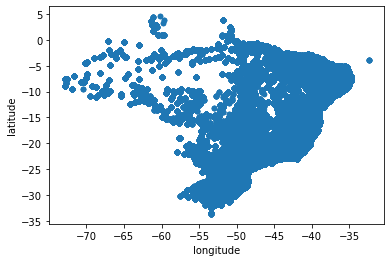

In [8]:
df.plot.scatter(x='longitude', y='latitude')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095171 entries, 0 to 5095170
Data columns (total 64 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_NACIONALIDADE        int64  
 6   TP_ST_CONCLUSAO         int64  
 7   TP_ANO_CONCLUIU         int64  
 8   TP_ESCOLA               int64  
 9   TP_ENSINO               float64
 10  IN_TREINEIRO            int64  
 11  CO_MUNICIPIO_ESC        float64
 12  NO_MUNICIPIO_ESC        object 
 13  CO_UF_ESC               float64
 14  SG_UF_ESC               object 
 15  TP_DEPENDENCIA_ADM_ESC  float64
 16  TP_LOCALIZACAO_ESC      float64
 17  TP_SIT_FUNC_ESC         float64
 18  CO_MUNICIPIO_PROVA      int64  
 19  NO_MUNICIPIO_PROVA      object 
 20  CO_UF_PROVA             int64  
 21  SG_UF_PROVA             object 

In [10]:
pd.set_option('max_rows', None)
df.isna().any()

NU_INSCRICAO              False
TP_FAIXA_ETARIA           False
TP_SEXO                   False
TP_ESTADO_CIVIL           False
TP_COR_RACA               False
TP_NACIONALIDADE          False
TP_ST_CONCLUSAO           False
TP_ANO_CONCLUIU           False
TP_ESCOLA                 False
TP_ENSINO                  True
IN_TREINEIRO              False
CO_MUNICIPIO_ESC           True
NO_MUNICIPIO_ESC           True
CO_UF_ESC                  True
SG_UF_ESC                  True
TP_DEPENDENCIA_ADM_ESC     True
TP_LOCALIZACAO_ESC         True
TP_SIT_FUNC_ESC            True
CO_MUNICIPIO_PROVA        False
NO_MUNICIPIO_PROVA        False
CO_UF_PROVA               False
SG_UF_PROVA               False
TP_PRESENCA_CN            False
TP_PRESENCA_CH            False
TP_PRESENCA_LC            False
TP_PRESENCA_MT            False
CO_PROVA_CN                True
CO_PROVA_CH                True
CO_PROVA_LC                True
CO_PROVA_MT                True
NU_NOTA_CN                 True
NU_NOTA_

**Trazendo informações descritivas de colunas de interesse**

In [11]:
idade = dict([(i,a) for i,a in zip(dicionario['TP_FAIXA_ETARIA'].dropna(), dicionario['TP_FAIXA_ETARIA_DEF'])])
civil = dict([(i,a) for i,a in zip(dicionario['TP_ESTADO_CIVIL'].dropna(), dicionario['TP_ESTADO_CIVIL_DEF'])])
cor = dict([(i,a) for i,a in zip(dicionario['TP_COR_RACA'].dropna(), dicionario['TP_COR_RACA_DEF'])])
nacionalidade = dict([(i,a) for i,a in zip(dicionario['TP_NACIONALIDADE'].dropna(), dicionario['TP_NACIONALIDADE_DEF'])])
internet = dict([(i,a) for i,a in zip(dicionario['Q025'].dropna(), dicionario['ACESSO_INTERNET'])])
serie_pai = dict([(i,a) for i,a in zip(dicionario['Q001'].dropna(), dicionario['SERIE_PAI'])])
serie_mae = dict([(i,a) for i,a in zip(dicionario['Q002'].dropna(), dicionario['SERIE_MAE'])])
renda = dict([(i,a) for i,a in zip(dicionario['Q006'].dropna(), dicionario['RENDA_FAMILIA'])])

In [12]:
df['FAIXA_ETARIA'] = [idade[valor] for valor in df.TP_FAIXA_ETARIA]
df['ESTADO_CIVIL'] = [civil[valor] for valor in df.TP_ESTADO_CIVIL]
df['COR_RACA'] = [cor[valor] for valor in df.TP_COR_RACA]
df['NACIONALIDADE'] = [nacionalidade[valor] for valor in df.TP_NACIONALIDADE]
df['ACESSO_INTERNET'] = [internet[valor] for valor in df.Q025]
df['SERIE_PAI'] = [serie_pai[valor] for valor in df.Q001]
df['SERIE_MAE'] = [serie_mae[valor] for valor in df.Q002]
df['RENDA_FAMILIAR'] = [renda[valor] for valor in df.Q006]

In [13]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,codigo_ibge,latitude,longitude,FAIXA_ETARIA,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,ACESSO_INTERNET,SERIE_PAI,SERIE_MAE,RENDA_FAMILIAR
0,190001595656,13,M,1,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,NaN,NaN,NaN,Entre 36 e 40 anos,Solteiro(a),Parda,Brasileiro(a),Sim.,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,Nenhuma renda.
1,190001421546,8,M,1,1,1,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,NaN,NaN,NaN,23 anos,Solteiro(a),Branca,Brasileiro(a),Sim.,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...","De R$ 998,01 até R$ 1.497,00."
2,190001133210,13,F,1,3,1,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,NaN,NaN,NaN,Entre 36 e 40 anos,Solteiro(a),Parda,Brasileiro(a),Sim.,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Até R$ 998,00."
3,190001199383,10,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,1,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,NaN,NaN,NaN,25 anos,Solteiro(a),Branca,Brasileiro(a),Sim.,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...","De R$ 1.996,01 até R$ 2.495,00."
4,190001237802,7,F,1,1,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3118601,Contagem,31,MG,1,1,1,1,504.0,510.0,513.0,516.0,513.6,575.5,570.7,677.0,0,860.0,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,NaN,NaN,NaN,22 anos,Solteiro(a),Branca,Brasileiro(a),Sim.,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","De R$ 2.994,01 até R$ 3.992,00."


**Analisando informações**

In [14]:
df.TP_SEXO.value_counts()

F    3031760
M    2063411
Name: TP_SEXO, dtype: int64

In [15]:
df.NO_MUNICIPIO_ESC.value_counts()

São Paulo                           52736
Fortaleza                           29738
Rio de Janeiro                      27440
Brasília                            21075
Manaus                              16141
Belo Horizonte                      14396
Salvador                            13330
Recife                              12181
Belém                               12087
Curitiba                            11580
São Luís                             9379
Goiânia                              8920
Teresina                             8092
Guarulhos                            6497
Campo Grande                         6406
Porto Alegre                         5951
João Pessoa                          5933
Natal                                5708
Campinas                             5477
Maceió                               5418
São Bernardo do Campo                4520
Aracaju                              4460
São José dos Campos                  4170
Cuiabá                            

In [16]:
df.SG_UF_ESC.value_counts()

SP    219424
CE    112313
MG    108173
RJ     73085
BA     70323
PE     61506
PR     52788
PA     46740
RS     46173
MA     43496
GO     35545
SC     34646
PB     26938
AM     25817
ES     25422
PI     24145
DF     21075
RN     20349
MT     18022
AL     17551
MS     15539
SE     13494
RO     12069
TO      9087
AP      6135
AC      5330
RR      2202
Name: SG_UF_ESC, dtype: int64

In [17]:
df.Q005.value_counts()

4     1639426
3     1299812
5      830371
2      645549
6      306830
1      142011
7      128878
8       55544
9       20919
10      14191
11       4469
12       2915
13       1511
14        749
15        619
20        572
16        331
17        183
18        159
19        132
Name: Q005, dtype: int64

In [18]:
df.FAIXA_ETARIA.value_counts()

18 anos               864166
17 anos               847284
19 anos               577155
20 anos               409378
Entre 26 e 30 anos    403776
Menor de 17 anos      400661
21 anos               290307
Entre 31 e 35 anos    235044
22 anos               233034
23 anos               187679
Entre 36 e 40 anos    158944
24 anos               156259
25 anos               128038
Entre 41 e 45 anos     93328
Entre 46 e 50 anos     55930
Entre 51 e 55 anos     31186
Entre 56 e 60 anos     14743
Entre 61 e 65 anos      5623
Entre 66 e 70 anos      1919
Maior de 70 anos         717
Name: FAIXA_ETARIA, dtype: int64

In [19]:
df.ESTADO_CIVIL.value_counts()

Solteiro(a)                                4398396
Casado(a)/Mora com companheiro(a)           395851
Não informado                               206796
Divorciado(a)/Desquitado(a)/Separado(a)      87892
Viúvo(a)                                      6236
Name: ESTADO_CIVIL, dtype: int64

In [20]:
df.RENDA_FAMILIAR.value_counts()

De R$ 998,01 até R$ 1.497,00.        1311444
Até R$ 998,00.                       1273225
De R$ 1.497,01 até R$ 1.996,00.       499611
De R$ 1.996,01 até R$ 2.495,00.       475554
De R$ 2.994,01 até R$ 3.992,00.       301913
Nenhuma renda.                        232070
De R$ 2.495,01 até R$ 2.994,00.       226250
De R$ 3.992,01 até R$ 4.990,00.       192905
De R$ 4.990,01 até R$ 5.988,00.       143650
De R$ 5.988,01 até R$ 6.986,00.        80787
De R$ 9.980,01 até R$ 11.976,00.       61645
De R$ 6.986,01 até R$ 7.984,00.        58026
Mais de R$ 19.960,00.                  57149
De R$ 11.976,01 até R$ 14.970,00.      50202
De R$ 7.984,01 até R$ 8.982,00.        44187
De R$ 8.982,01 até R$ 9.980,00.        43300
De R$ 14.970,01 até R$ 19.960,00.      43253
Name: RENDA_FAMILIAR, dtype: int64

In [21]:
df.SERIE_PAI.value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1308970
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     1135800
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     723504
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        586610
Não sei.                                                                                    444791
Completou a Faculdade, mas não completou a Pós-graduação.                                   375707
Nunca estudou.                                                                              290612
Completou a Pós-graduação.                                                                  229177
Name: SERIE_PAI, dtype: int64

In [22]:
df.SERIE_MAE.value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1633666
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      854819
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     686182
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        667400
Completou a Faculdade, mas não completou a Pós-graduação.                                   513696
Completou a Pós-graduação.                                                                  399459
Nunca estudou.                                                                              194620
Não sei.                                                                                    145329
Name: SERIE_MAE, dtype: int64

In [23]:
df.COR_RACA.value_counts()

Parda            2364011
Branca           1831750
Preta             648298
Amarela           116157
Não declarado     103199
Indígena           31756
Name: COR_RACA, dtype: int64

Text(0.5, 0, 'Cor/Raça')

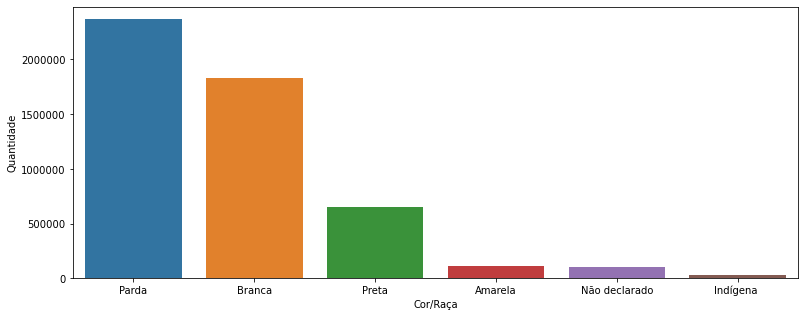

In [24]:
f, ax = plt.subplots(figsize = (13,5))
cg = sns.barplot(x='index', y='COR_RACA',
                 data=df.COR_RACA.value_counts().reset_index())
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Quantidade')
plt.xlabel('Cor/Raça')

In [25]:
df.NACIONALIDADE.value_counts()

Brasileiro(a)                                    4949923
Brasileiro(a) Naturalizado(a)                     124331
Brasileiro(a) Nato(a), nascido(a) no exterior       8233
Não informado                                       6749
Estrangeiro(a)                                      5935
Name: NACIONALIDADE, dtype: int64

In [26]:
df.ACESSO_INTERNET.value_counts()

Sim.    3954733
Não.    1140438
Name: ACESSO_INTERNET, dtype: int64

In [27]:
df.TP_LINGUA.value_counts() # 0: inglês, 1: espanhol

1    2673447
0    2421724
Name: TP_LINGUA, dtype: int64

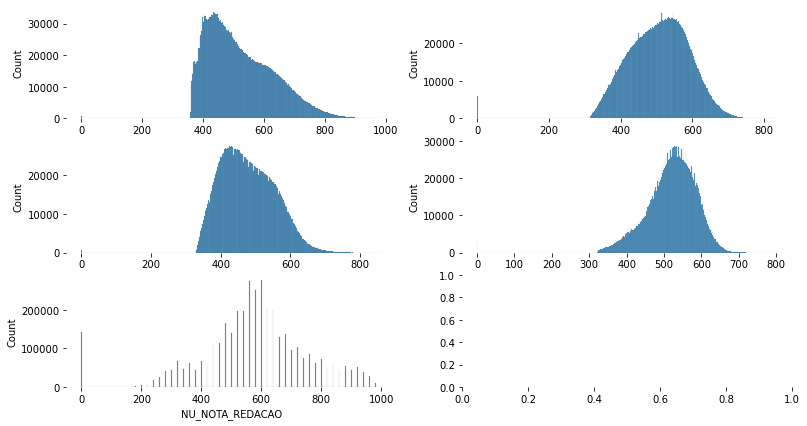

In [28]:
f, axes = plt.subplots(3, 2, figsize=(13,7))
sns.histplot(x='NU_NOTA_MT', data=df, ax=axes[0,0])
sns.histplot(x='NU_NOTA_CH', data=df, ax=axes[0,1])
sns.histplot(x='NU_NOTA_CN', data=df, ax=axes[1,0])
sns.histplot(x='NU_NOTA_LC', data=df, ax=axes[1,1])
sns.histplot(x='NU_NOTA_REDACAO', data=df, ax=axes[2,0])
sns.despine(bottom=True, left=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

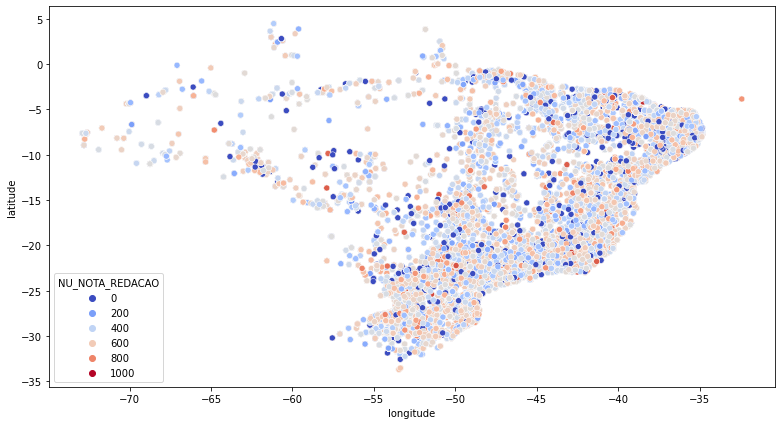

In [29]:
f, axes = plt.subplots(figsize=(13,7))
sns.scatterplot(x='longitude', y='latitude', hue='NU_NOTA_REDACAO', palette="coolwarm", data=df)

<AxesSubplot:title={'center':'NOTA LING. E CÓDIGOS'}, xlabel='longitude', ylabel='latitude'>

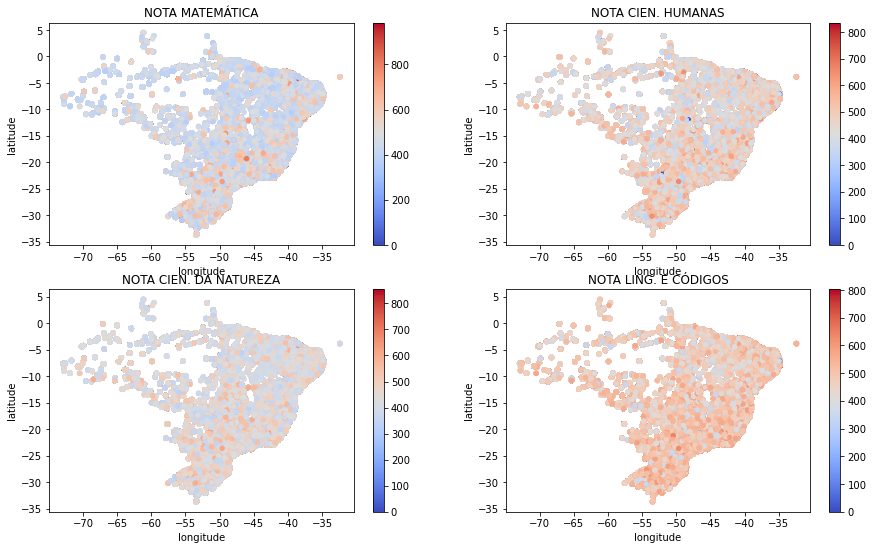

In [30]:
f, axes = plt.subplots(2, 2, figsize=(15,9))
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_MT, cmap='coolwarm', ax=axes[0,0], title='NOTA MATEMÁTICA')
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_CH, cmap='coolwarm', ax=axes[0,1], title='NOTA CIEN. HUMANAS')
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_CN, cmap='coolwarm', ax=axes[1,0], title='NOTA CIEN. DA NATUREZA')
df.plot.scatter(x='longitude', y='latitude', c=df.NU_NOTA_LC, cmap='coolwarm', ax=axes[1,1], title='NOTA LING. E CÓDIGOS')

<AxesSubplot:xlabel='NU_NOTA_LC'>

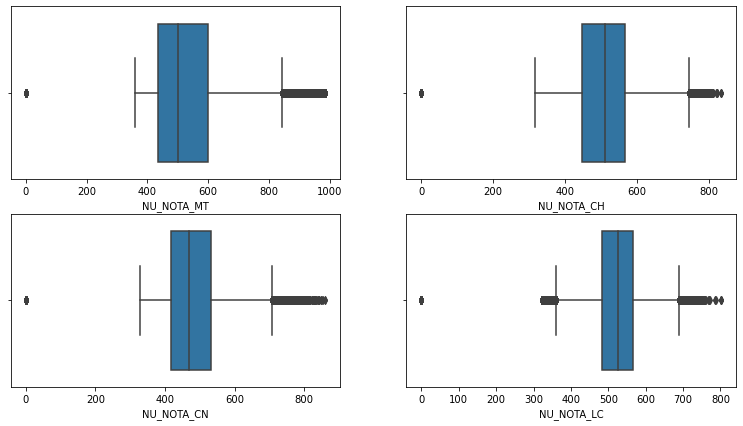

In [31]:
f, axes = plt.subplots(2, 2, figsize = (13,7))
sns.boxplot(x='NU_NOTA_MT', data=df,ax=axes[0,0])
sns.boxplot(x='NU_NOTA_CH', data=df,ax=axes[0,1])
sns.boxplot(x='NU_NOTA_CN', data=df,ax=axes[1,0])
sns.boxplot(x='NU_NOTA_LC', data=df,ax=axes[1,1])

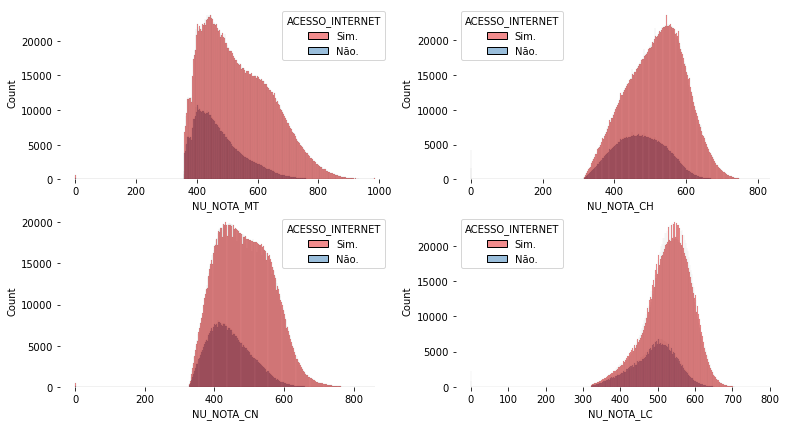

In [32]:
f, axes = plt.subplots(2, 2, figsize = (13,7))
sns.histplot(x='NU_NOTA_MT', hue='ACESSO_INTERNET', data=df,ax=axes[0,0], palette='Set1')
sns.histplot(x='NU_NOTA_CH', hue='ACESSO_INTERNET', data=df,ax=axes[0,1], palette='Set1')
sns.histplot(x='NU_NOTA_CN', hue='ACESSO_INTERNET', data=df,ax=axes[1,0], palette='Set1')
sns.histplot(x='NU_NOTA_LC', hue='ACESSO_INTERNET', data=df,ax=axes[1,1], palette='Set1')
sns.despine(bottom=True, left=True)

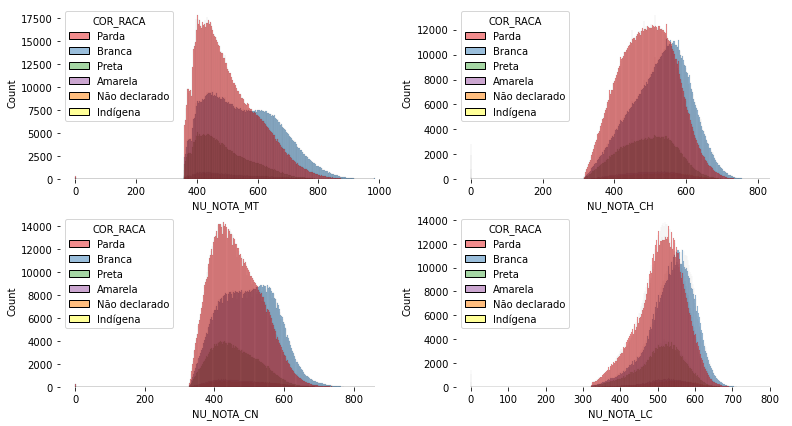

In [33]:
f, axes = plt.subplots(2, 2, figsize = (13,7))
sns.histplot(x='NU_NOTA_MT', hue='COR_RACA', data=df,ax=axes[0,0], palette='Set1')
sns.histplot(x='NU_NOTA_CH', hue='COR_RACA', data=df,ax=axes[0,1], palette='Set1')
sns.histplot(x='NU_NOTA_CN', hue='COR_RACA', data=df,ax=axes[1,0], palette='Set1')
sns.histplot(x='NU_NOTA_LC', hue='COR_RACA', data=df,ax=axes[1,1], palette='Set1')
sns.despine(bottom=True, left=True)

In [34]:
pd.set_option('max_columns', None)
df.groupby('COR_RACA')[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].describe()

NU_NOTA_MT                                                    \
                   count        mean         std  min    25%    50%    75%   
COR_RACA                                                                     
Amarela          84957.0  525.549803  114.224756  0.0  434.3  499.8  599.7   
Branca         1377694.0  555.981330  116.953347  0.0  458.2  544.6  642.1   
Indígena         21603.0  475.669088   83.441263  0.0  412.8  456.8  521.7   
Não declarado    73677.0  532.981499  117.098165  0.0  437.2  509.2  616.0   
Parda          1698103.0  504.366300   99.214745  0.0  426.4  482.5  567.1   
Preta           454301.0  493.800255   91.131568  0.0  422.7  474.4  550.4   

                     NU_NOTA_CN                                            \
                 max      count        mean        std  min    25%    50%   
COR_RACA                                                                    
Amarela        985.5    84957.0  477.347951  78.445449  0.0  416.3  467.3   
Branca         985.5  1377694.0  499.296729  79.397601  0.0  436.3  499.0   
Indígena       885.6    21603.0  444.131051  62.657491  0.0  396.8  434.6   
Não declarado  985.5    73677.0  486.548931  82.346708  0.0  420.1  479.4   
Parda          985.0  1698103.0  464.964260  70.995418  0.0  410.1  456.1   
Preta          985.0   454301.0  461.047321  67.348133  0.0  409.2  453.5   

                            NU_NOTA_CH                                     \
                 75%    max      count        mean        std  min    25%   
COR_RACA                                                                    
Amarela        531.3  815.3    89826.0  502.410703  81.944344  0.0  443.6   
Branca         558.8  853.5  1450775.0  529.261393  82.697595  0.0  473.3   
Indígena       483.9  745.4    23323.0  468.774291  74.024527  0.0  416.0   
Não declarado  548.5  816.7    78154.0  515.252251  89.979047  0.0  449.8   
Parda          514.2  860.9  1798211.0  493.773780  79.139995  0.0  436.4   
Preta          508.0  812.6   482757.0  492.745154  77.816500  0.0  436.6   

                                    NU_NOTA_LC                              \
                 50%     75%    max      count        mean        std  min   
COR_RACA                                                                     
Amarela        503.7  560.40  798.3    89826.0  518.429190  63.168277  0.0   
Branca         536.8  588.00  835.1  1450775.0  538.369340  61.688260  0.0   
Indígena       466.0  520.25  723.2    23323.0  485.667706  64.903863  0.0   
Não declarado  519.0  581.20  809.4    78154.0  525.037356  69.680674  0.0   
Parda          494.8  550.80  822.7  1798211.0  509.535740  63.117202  0.0   
Preta          495.5  549.50  802.2   482757.0  509.116492  61.929512  0.0   

                                           
                 25%    50%    75%    max  
COR_RACA                                   
Amarela        482.7  523.1  561.4  801.7  
Branca         504.0  545.3  580.9  801.7  
Indígena       444.0  492.0  530.9  695.9  
Não declarado  483.1  531.5  575.5  755.3  
Parda          472.4  514.9  553.0  801.7  
Preta          473.9  515.3  551.6  741.4

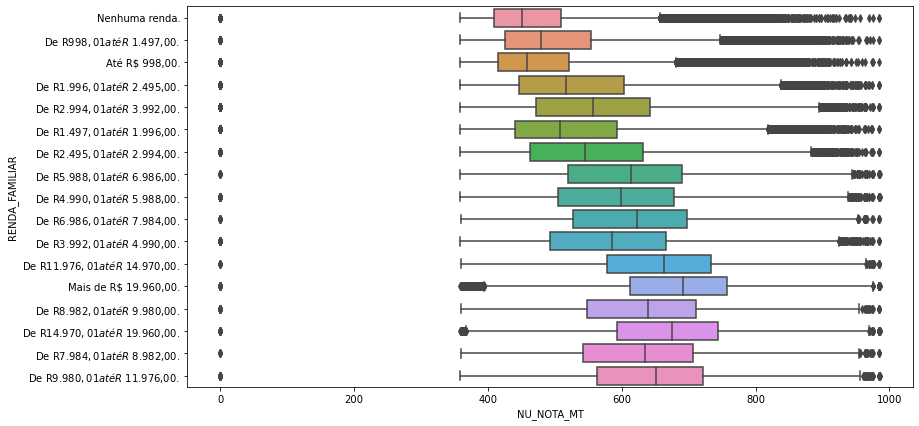

In [35]:
f, axes = plt.subplots(figsize = (13,7))
sns.boxplot(x='NU_NOTA_MT', data=df, y='RENDA_FAMILIAR')
plt.style.use('ggplot')

In [36]:
grupo = ['COR_RACA', 'RENDA_FAMILIAR', 'ACESSO_INTERNET', 'SERIE_PAI', 'SERIE_MAE']
agp = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
socio = df.groupby(grupo)[agp].describe().reset_index()
socio.to_csv('enem_eed.csv', sep=';', index=False, decimal='.')

In [37]:
socio.head()

COR_RACA  RENDA_FAMILIAR ACESSO_INTERNET  \
                                             
0  Amarela  Até R$ 998,00.            Não.   
1  Amarela  Até R$ 998,00.            Não.   
2  Amarela  Até R$ 998,00.            Não.   
3  Amarela  Até R$ 998,00.            Não.   
4  Amarela  Até R$ 998,00.            Não.   

                                           SERIE_PAI  \
                                                       
0  Completou a 4ª série/5º ano, mas não completou...   
1  Completou a 4ª série/5º ano, mas não completou...   
2  Completou a 4ª série/5º ano, mas não completou...   
3  Completou a 4ª série/5º ano, mas não completou...   
4  Completou a 4ª série/5º ano, mas não completou...   

                                           SERIE_MAE NU_NOTA_MT              \
                                                          count        mean   
0  Completou a 4ª série/5º ano, mas não completou...      455.0  472.672967   
1  Completou a 8ª série/9º ano do Ensino Fundamen...      247.0  475.957490   
2  Completou a Faculdade, mas não completou a Pós...       27.0  483.181481   
3                         Completou a Pós-graduação.        7.0  476.942857   
4  Completou o Ensino Médio, mas não completou a ...      305.0  470.160984   

                                                  NU_NOTA_CN              \
         std    min     25%    50%     75%    max      count        mean   
0  75.490295  359.3  416.85  457.3  516.25  825.1      455.0  440.333846   
1  77.293036  359.8  418.05  460.8  522.95  742.9      247.0  446.436437   
2  82.083939  363.6  418.15  468.9  522.85  678.4       27.0  436.911111   
3  83.029450  383.2  436.95  460.9  486.80  647.0        7.0  480.614286   
4  70.765132  359.3  414.40  459.1  513.10  745.9      305.0  438.091803   

                                                  NU_NOTA_CH              \
         std    min     25%    50%     75%    max      count        mean   
0  56.470086  338.2  399.35  435.1  475.25  617.6      488.0  462.371926   
1  56.612782  337.0  406.20  443.1  483.85  641.9      258.0  474.677519   
2  53.460937  347.6  392.00  437.8  483.10  531.8       28.0  487.132143   
3  43.709817  432.4  450.15  455.7  517.00  541.9        7.0  490.385714   
4  55.885804  330.0  393.20  435.0  471.50  592.3      325.0  469.420000   

                                                    NU_NOTA_LC              \
         std    min      25%     50%     75%    max      count        mean   
0  65.143653  323.3  419.300  460.10  508.85  660.8      488.0  486.876230   
1  66.305560  330.1  432.525  474.65  519.00  651.2      258.0  495.408915   
2  56.861294  356.0  459.450  499.90  528.50  602.3       28.0  492.214286   
3  67.184781  414.6  428.250  499.90  543.80  574.1        7.0  513.314286   
4  70.845004    0.0  419.200  473.80  522.30  615.4      325.0  491.743077   

                                                     NU_NOTA_REDACAO  \
         std    min      25%     50%      75%    max           count   
0  54.643102  326.2  454.975  493.25  523.100  631.8           488.0   
1  51.784973  328.5  466.350  501.25  526.100  624.1           258.0   
2  56.819609  348.3  471.425  499.75  536.425  573.9            28.0   
3  55.710604  424.7  484.500  510.30  552.550  584.1             7.0   
4  58.546890    0.0  458.900  497.50  530.400  602.9           325.0   

                                                              
         mean         std    min    25%    50%    75%    max  
0  492.704918  181.082925    0.0  420.0  520.0  600.0  980.0  
1  524.573643  170.855061    0.0  460.0  560.0  620.0  940.0  
2  567.857143  113.834094  320.0  515.0  570.0  620.0  900.0  
3  522.857143   99.618319  400.0  460.0  480.0  600.0  660.0  
4  526.584615  166.969252    0.0  460.0  560.0  620.0  960.0